In [1]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from keras.datasets.mnist import load_data

from unet import UNet
from diffusion_model import DiffusionModel
import matplotlib.pyplot as plt

In [2]:
(trainX, trainy), (testX, testy) = load_data()
trainX = np.float32(trainX) / 255.
testX = np.float32(testX) / 255.

def sample_batch(batch_size, device):
    indices = torch.randperm(trainX.shape[0])[:batch_size]
    data = torch.from_numpy(trainX[indices]).unsqueeze(1).to(device)
    return torch.nn.functional.interpolate(data, 32)

In [3]:
device = 'cuda'
model = torch.load('model_paper2_epoch_39999').to(device)
diffusion_model = DiffusionModel(1000, model, device)

In [4]:
def forward(diffusion_model, T, x0):
    
    x_forward = []
    x = x0
    for t in range(T):
        std = torch.sqrt(diffusion_model.beta[t])
        x = x + torch.randn_like(x) * std
        x_forward.append(x)
    return x_forward

In [17]:
@torch.no_grad()
def inpaining(self, x0, mask):

    # Run the forward process
    x = x0.clone()
    x_forward = [x]
    for t in range(self.T):
        std = torch.sqrt(diffusion_model.beta[t])
        x = torch.sqrt(1 - diffusion_model.beta[t]) * x + torch.randn_like(x) * std
        x_forward.append(x.clone())

    x = x_forward[-1]

    for t in tqdm(range(self.T, 0, -1)):
        z = torch.randn_like(x) if t > 1 else torch.zeros_like(x)

        t_tensor = torch.ones(x0.shape[0], dtype=torch.long, device=self.device) * t 

        beta_t = self.beta[t-1].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
        alpha_t = self.alpha[t-1].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
        alpha_bar_t = self.alpha_bar[t-1].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)

        mean = 1 / torch.sqrt(alpha_t) * (x - ((1 - alpha_t) / torch.sqrt(
            1 - alpha_bar_t)) * self.function_approximator(x, t_tensor-1))
        sigma = torch.sqrt(beta_t)
        
        x = x_forward[t-1]
        x[mask] = (mean + sigma * z)[mask]

    return x

100%|██████████| 1000/1000 [00:32<00:00, 30.88it/s]


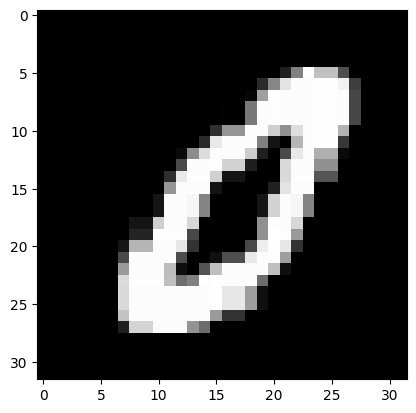

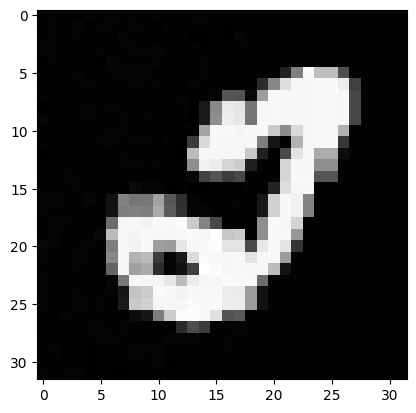

In [22]:
x0 = sample_batch(2, device)
mask = torch.zeros_like(x0).bool()
mask[:, :, :, :18] = 1.
x = inpaining(diffusion_model, x0, mask)
plt.imshow(x0[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()
plt.imshow(x[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()

100%|██████████| 1000/1000 [00:31<00:00, 31.30it/s]


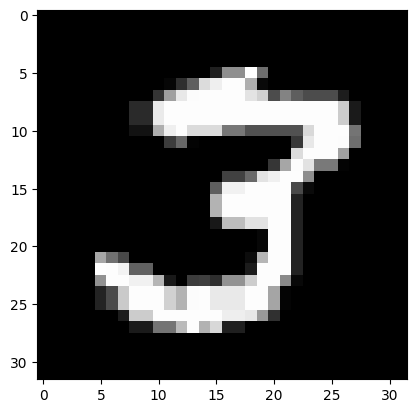

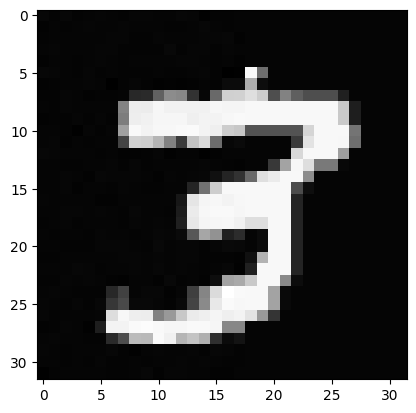

In [23]:
x0 = sample_batch(2, device)
mask = torch.zeros_like(x0).bool()
mask[:, :, :, :18] = 1.
x = inpaining(diffusion_model, x0, mask)
plt.imshow(x0[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()
plt.imshow(x[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()

100%|██████████| 1000/1000 [00:32<00:00, 31.14it/s]


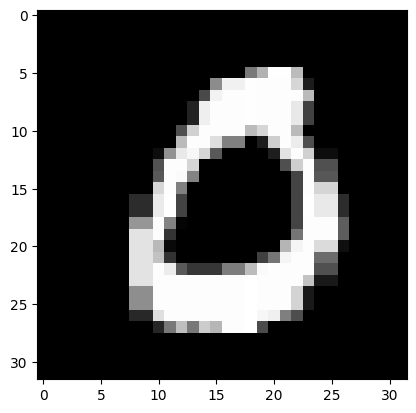

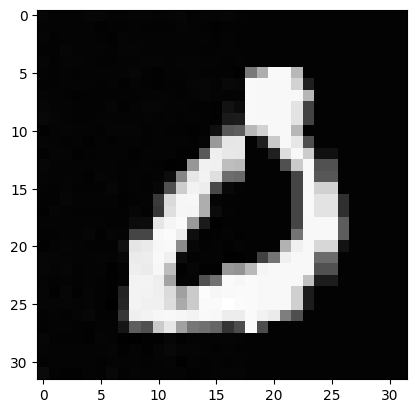

In [24]:
x0 = sample_batch(2, device)
mask = torch.zeros_like(x0).bool()
mask[:, :, :, :18] = 1.
x = inpaining(diffusion_model, x0, mask)
plt.imshow(x0[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()
plt.imshow(x[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()

100%|██████████| 1000/1000 [00:31<00:00, 31.56it/s]


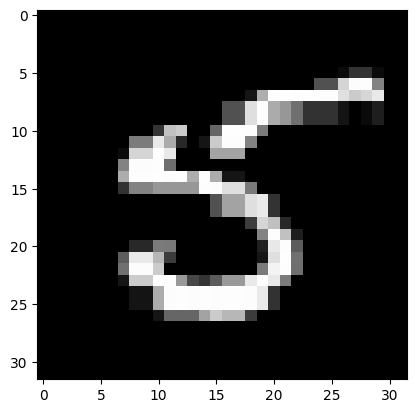

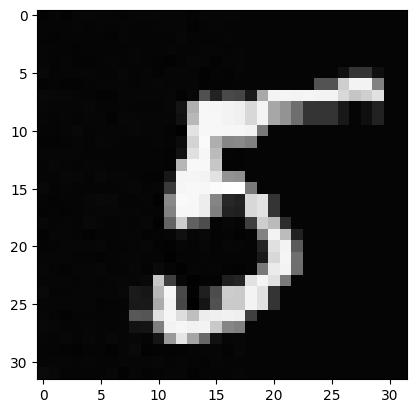

In [32]:
x0 = sample_batch(2, device)
mask = torch.zeros_like(x0).bool()
mask[:, :, :, :18] = 1.
x = inpaining(diffusion_model, x0, mask)
plt.imshow(x0[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()
plt.imshow(x[0, 0].data.cpu().numpy(), cmap='gray')
plt.show()